**<H3 align:right>DEFINING PROBLEM STATEMENT AND BUSINESS CASE</H3>**
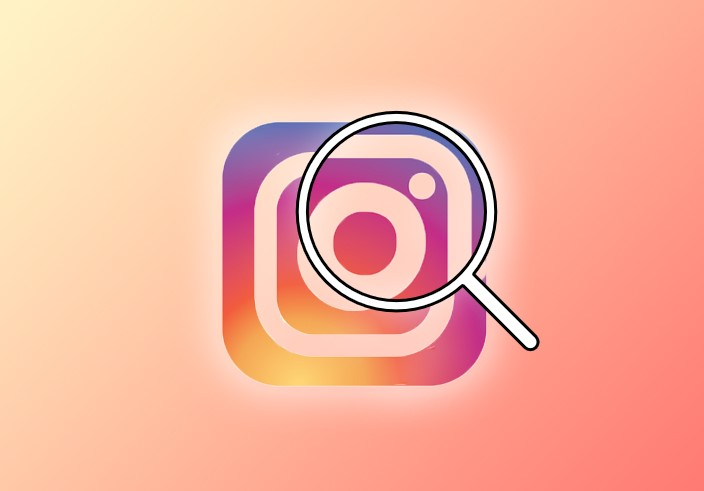



**<H3 align:right>FAKE INSTAGRAM ACOUNT DETECTOR</H3>**

---
**<h4>UNDERSTANDING THE PROBLEM**



* This project aim is to build and train a deep neural network model to detect fake or spam instagram accounts.
*  These days spam accounts have become a major problem in in all the social media platforms.

* Many users are creating fake accounts to create an illusion of having many followers to thier personal accounts.


*  Fake accounts are being created to sell fake products and services.
*  They are also being used to impersonate other account users from common people to celebrities in order to influence, criticize, hurt feelings and reputation.

<br>

*  There are few key input features which we considered to determine if the account is fake or not.

*   THE *INPUT FEATURES* ARE:


1.   **PROFILE PICTURE** - The user has profile picture or not.
2.   **NUMS/LENGTH USERNAM**E - The ratio of number of numerical chars in username to its length.
3.  **FULLNAME WORDS** - Full name in word tokens
4.   **NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.
5.   **NAME == USERNAME** - Are username and full name literally the same?
6.   **DESCRIPTION LENGTH** - Bio length in characters.
7.   **EXTERNAL URL** - Has external URL or not.
8.   **PRIVATE** - Private or not.
9.   **POSTS** - Number of posts.
10.  **FOLLOWERS** - Number of followers.
11.  **FOLLOWS** - Number of follows.


**<h4> TRAINED DETECTOR MODEL:**

---
This model is trained such that it considers the above given features and determines whether a particular account is fake or not. By resulting the output as either 0 or 1 meaning TRUSTED or FAKE respectively. Our intention is to make this software capable of thinking like a human, based on the data it is given and results in maximum probability of success.





**<H3>TASK 1**

---

* **<h2>LOADING LIBRAIRES**











In [2]:
 #installing tensorflow version 2.0
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.2 MB/s eta 0:00:00
  Att

In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [2]:
#styling purpose
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

* **<H2>LOADING DATASETS**

---



In [4]:
#Load the training and testing datasets
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [5]:
#the dataset which will be used for training purpose (576 records)
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
#the dataset which will be used for testing purpose (120 records)
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


**<H1>TASK 2: <h3>PERFORMING EXPLORATORY DATA ANALYSIS**

---



*   **<h3><i>Performing Exploratory Data Anlaysis For "Training Dataset"**

In [7]:
#Getting dataframe info

instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
#Statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [9]:
#Check if null values exist
instagram_df_train.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [10]:
#Number of unique values in the profile pic column
instagram_df_train['profile pic'].value_counts()

,count
profile pic,
1,404
0,172


In [11]:
#Number of fake and real accounts
instagram_df_train['fake'].value_counts()

,count
fake,
0,288
1,288


In [12]:
#Number of accounts having an external URL
instagram_df_train['external URL'].value_counts()

,count
external URL,
0,509
1,67


In [13]:
#Number of accounts having description length over 50
(instagram_df_train['description length'] > 50).sum()

98



*   **<h2><i>Performing Exploratory Data Anlaysis For "Testing Dataset"**



In [14]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [15]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [16]:
instagram_df_test.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [17]:
instagram_df_test['fake'].value_counts()

,count
fake,
0,60
1,60


**<H1>TASK 3**

---


**<h2>PERFROMING DATA VISUALIZATION**

<ipython-input-18-dd78a587a5d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=instagram_df_train, palette='colorblind')


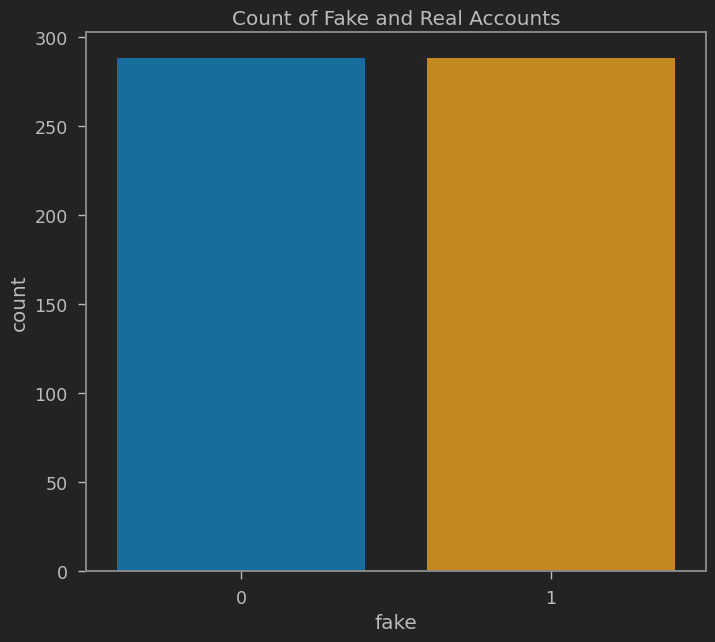

In [18]:
#Vislualizing the number of fake and real accounts (using seaborn library)
instagram_df_train['fake'] = instagram_df_train['fake'].astype(int)
sns.countplot(x='fake', data=instagram_df_train, palette='colorblind')
plt.title("Count of Fake and Real Accounts")
plt.show()

<ipython-input-19-b5768f3ac662>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private', data=instagram_df_train, palette='PuBu')


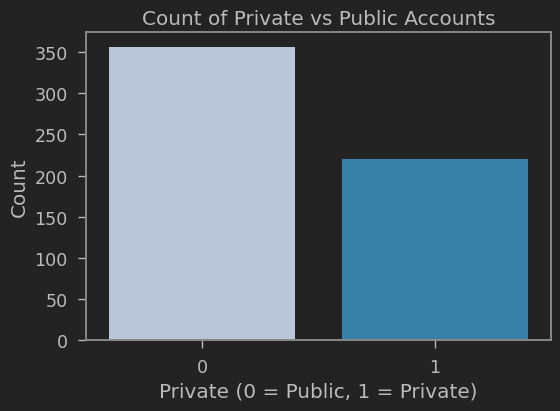

In [19]:
#Visualizing the private column
plt.figure(figsize=(6,4))
sns.countplot(x='private', data=instagram_df_train, palette='PuBu')
plt.title("Count of Private vs Public Accounts")
plt.xlabel("Private (0 = Public, 1 = Private)")
plt.ylabel("Count")
plt.show()

<ipython-input-20-418b1d561f79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile pic', data=instagram_df_train, palette='Pastel2')


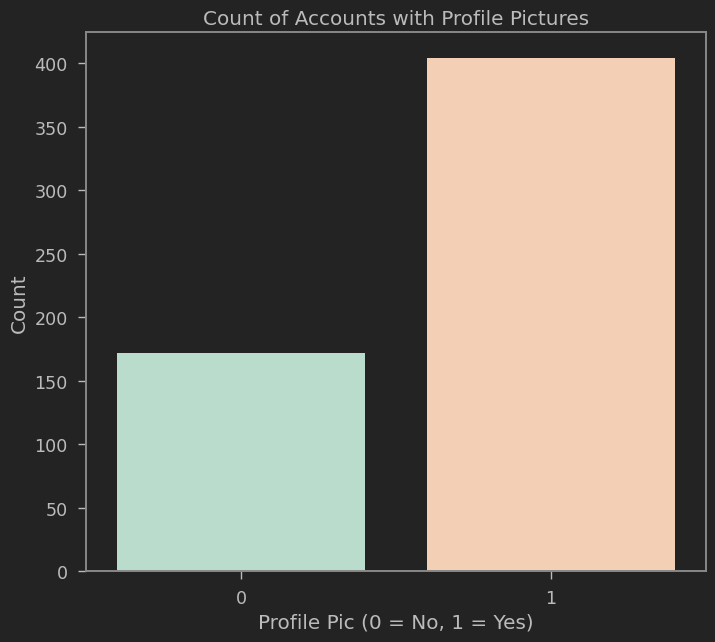

In [20]:
#Visualizing the profile pic feature
sns.countplot(x='profile pic', data=instagram_df_train, palette='Pastel2')
plt.title("Count of Accounts with Profile Pictures")
plt.xlabel("Profile Pic (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-21-053b897aa573>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'],kde=True)


<Axes: xlabel='nums/length username', ylabel='Density'>

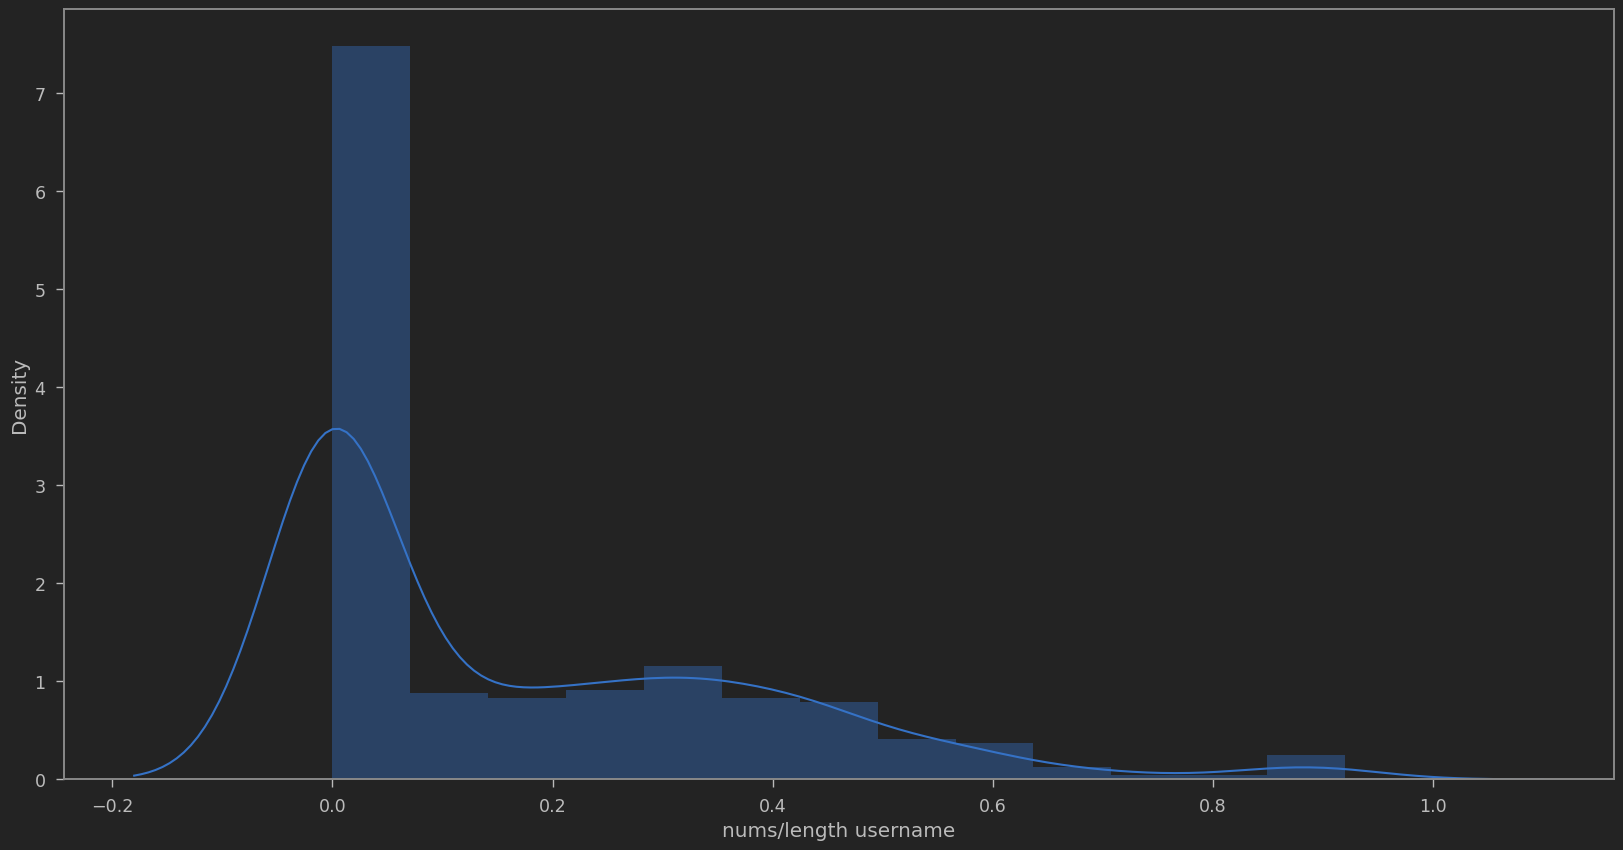

In [21]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'],kde=True)

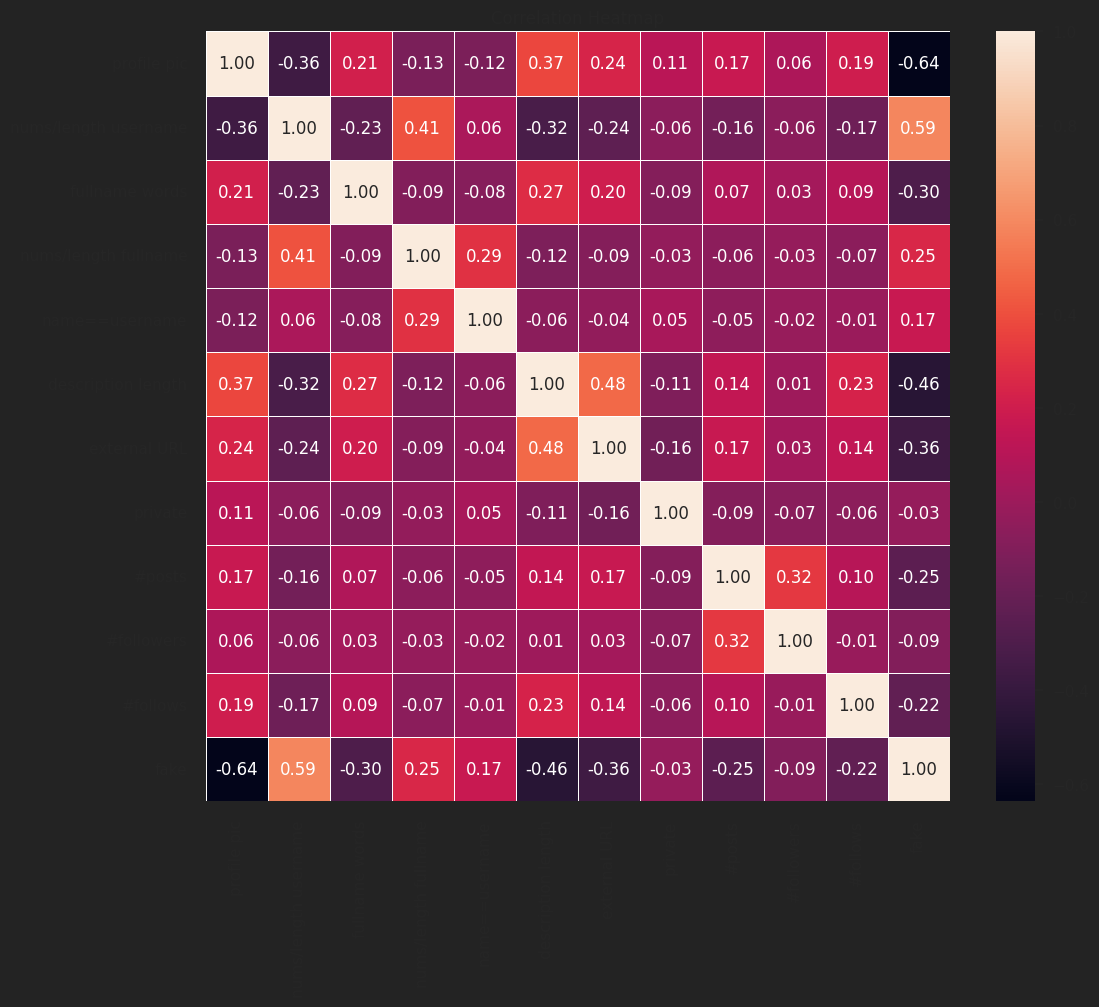

In [22]:
#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")
correlation_matrix = instagram_df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="rocket", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-23-77702983c374>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=instagram_df_test, palette='pastel')


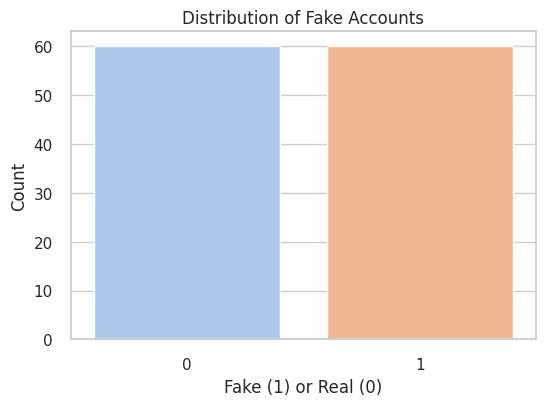

In [23]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(x='fake', data=instagram_df_test, palette='pastel')
plt.title('Distribution of Fake Accounts')
plt.xlabel('Fake (1) or Real (0)')
plt.ylabel('Count')
plt.show()

<ipython-input-24-97586d3c4a9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private', data=instagram_df_test, palette="Set2")


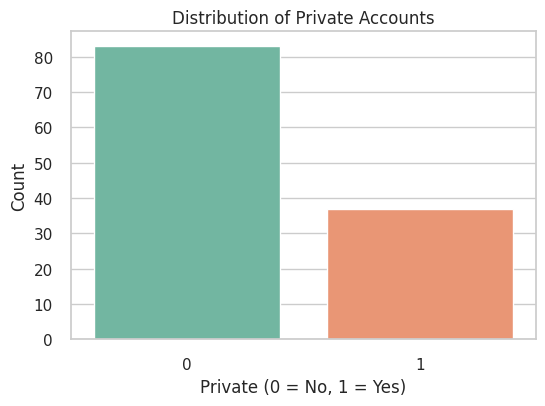

In [24]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(x='private', data=instagram_df_test, palette="Set2")
plt.title("Distribution of Private Accounts")
plt.xlabel("Private (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-25-628f64c0937c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile pic', data=instagram_df_test, palette=["skyblue", "lightgreen"])


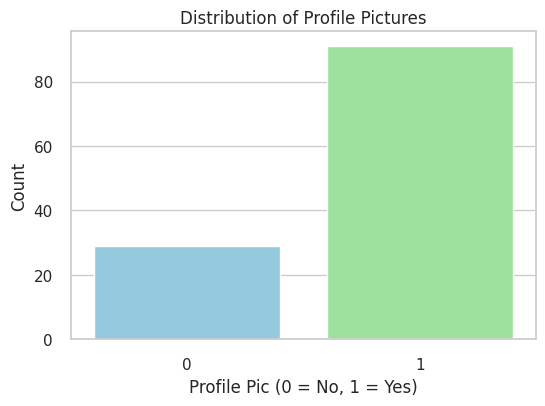

In [25]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(x='profile pic', data=instagram_df_test, palette=["skyblue", "lightgreen"])
plt.title("Distribution of Profile Pictures")
plt.xlabel("Profile Pic (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**<H1>TASK 4**

---

**<h2>PREPARING THE DATA TO FEED THE MODEL**

In [26]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [27]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [28]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

,fake
0,0
1,0
2,0
3,0
4,0
...,...
571,1
572,1
573,1
574,1


In [29]:
y_test

,fake
0,0
1,0
2,0
3,0
4,0
...,...
115,1
116,1
117,1
118,1


In [30]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [31]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [32]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [33]:
Y_train.shape,Y_test.shape

((576, 2), (120, 2))

In [34]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage


82.75862068965517

In [35]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage


17.24137931034483

**<H1>TASK-5**

---

**<h2><I>BUILD A SIMPLE DEEP LEARNING MODEL**


In [36]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential()
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 5

In [37]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 17ms/step - loss: 0.6004 - accuracy: 0.6699 - val_loss: 0.4820 - val_accuracy: 0.7759
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8668 - val_loss: 0.3471 - val_accuracy: 0.8276
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.8745 - val_loss: 0.2954 - val_accuracy: 0.8276
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.8842 - val_loss: 0.2466 - val_accuracy: 0.8621
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.9035 - val_loss: 0.2348 - val_accuracy: 0.8793
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.8996 - val_loss: 0.1881 - val_accuracy: 0.9138
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.9035 - val_loss: 0.2262 - val_accuracy: 0.8966
Epoch 8/20
17/17 [=

**<h2> TASK-6</h2>**

---


**<h2><i>ASSESSING THE PRERFORMANCE OF THE MODEL**

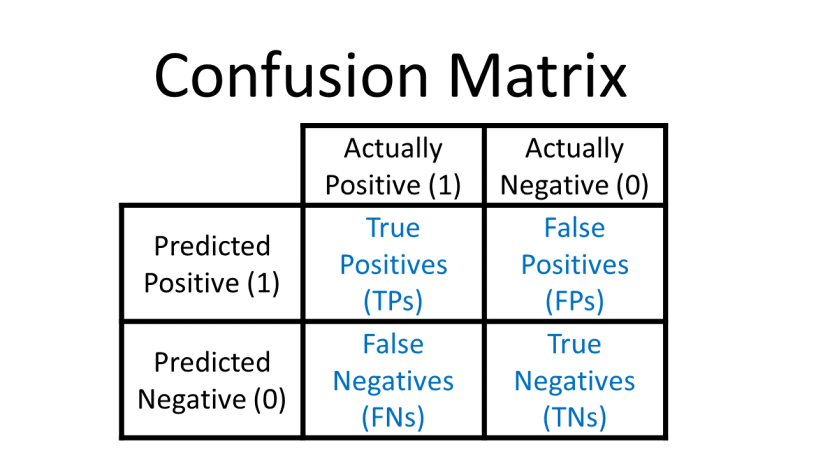

In [39]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


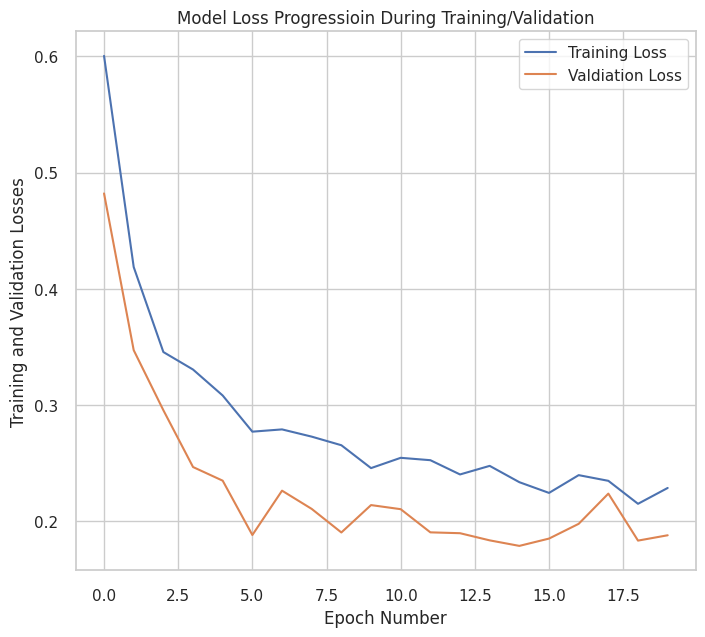

In [40]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])


In [41]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [42]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [43]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



<Axes: >

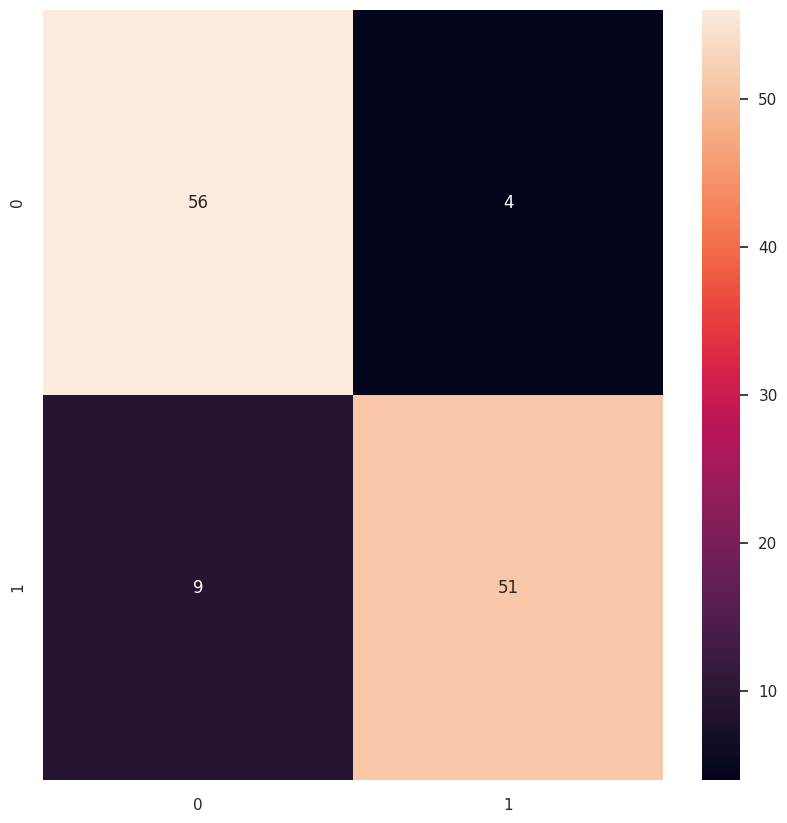

In [44]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

**<h2> TASK-7</h2>**

---


**<h2><i>BUILDING A SIMPLE Artificial Neural Network (ANN)**

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
# Define the model architecture
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # To prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
18/18 [==============================] - 1s 13ms/step - loss: 2713.4919 - accuracy: 0.5052 - val_loss: 38.3037 - val_accuracy: 0.4917
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 774.0786 - accuracy: 0.5243 - val_loss: 28.1535 - val_accuracy: 0.5500
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 2166.5569 - accuracy: 0.6042 - val_loss: 22.0025 - val_accuracy: 0.5917
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 13.6007 - accuracy: 0.6285 - val_loss: 19.9876 - val_accuracy: 0.6667
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 26.5393 - accuracy: 0.6528 - val_loss: 19.4392 - val_accuracy: 0.7000
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 17.1654 - accuracy: 0.6372 - val_loss: 18.8760 - val_accuracy: 0.7083
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 17.3406 - accuracy: 0.6580 - val_loss: 17.7900 - val_accuracy: 0.7333


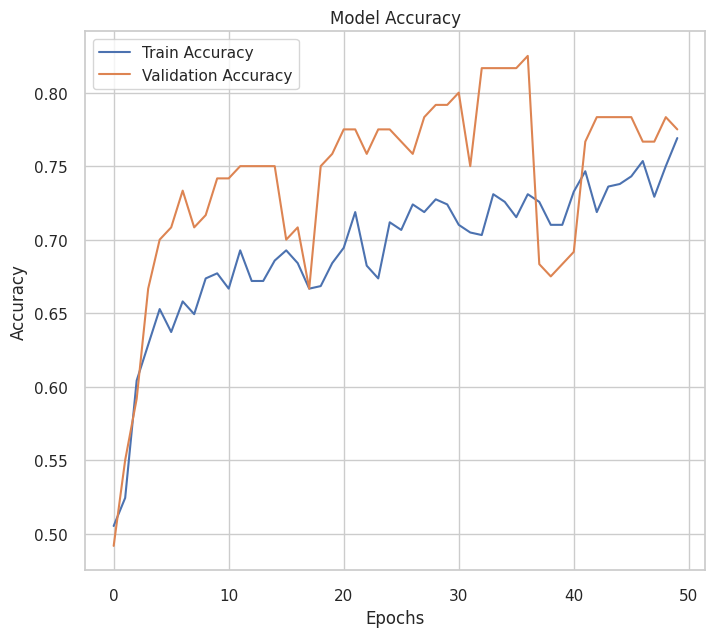

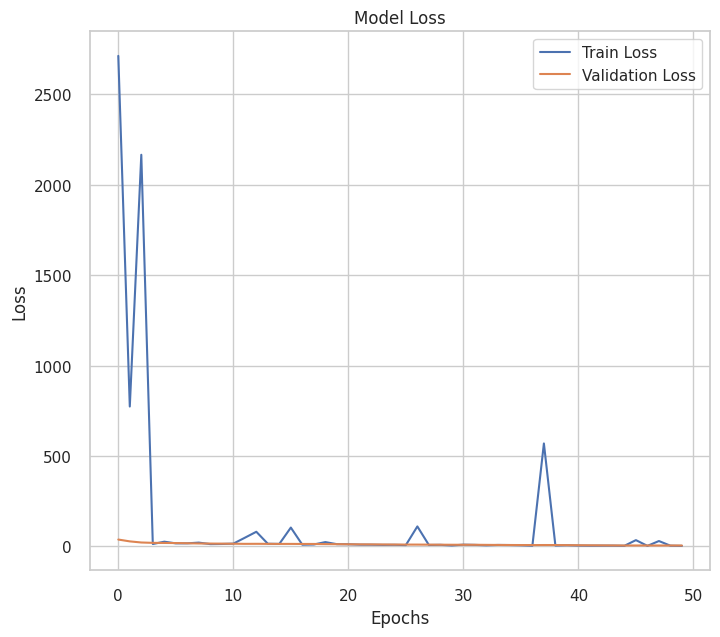

In [47]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 4ms/step - loss: 1.0871 - accuracy: 0.5000
Test Accuracy: 0.5000


**<h2> TASK-8</h2>**

---


**<h2><i>ASSESSING THE PRERFORMANCE OF THE MODEL**

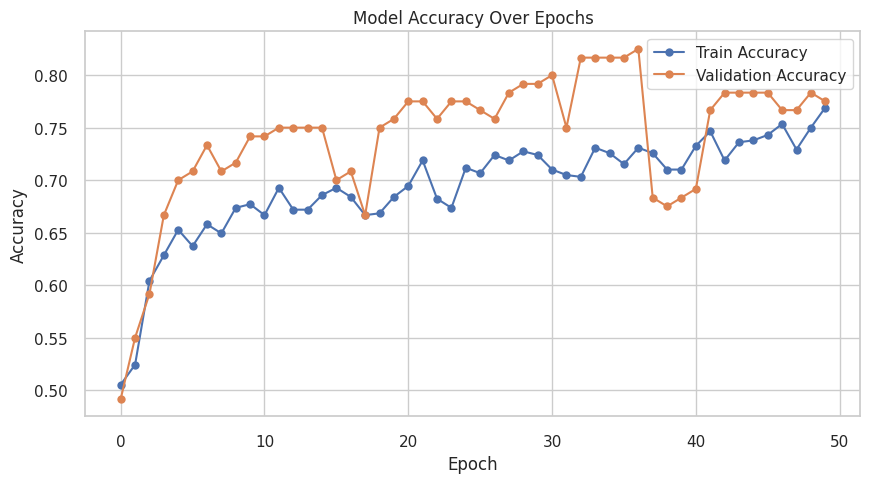

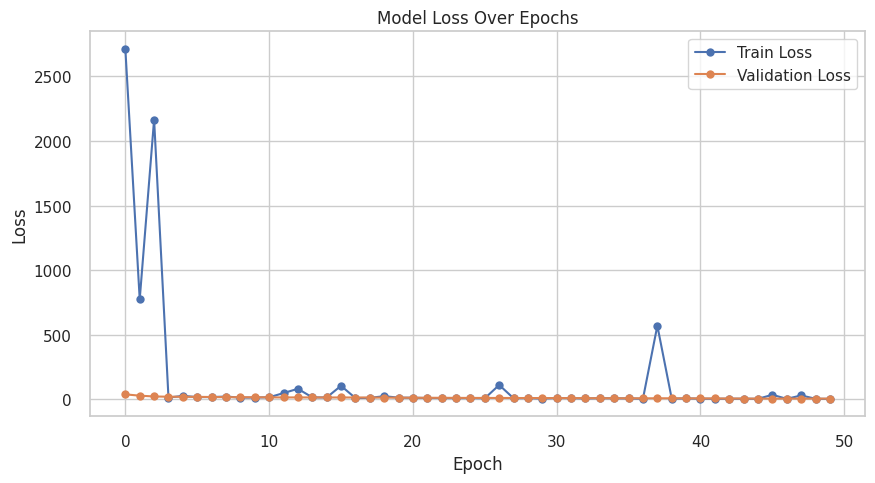

Test Accuracy of the ANN Model: 50.00%


In [51]:
# Accuracy and Loss Plots
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy of the ANN Model: {accuracy * 100:.2f}%")

4/4 [==============================] - 0s 2ms/step


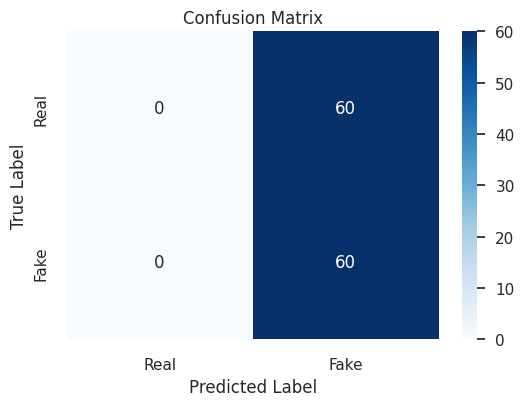

Classification Report:
              precision    recall  f1-score   support

        Real       0.00      0.00      0.00        60
        Fake       0.50      1.00      0.67        60

    accuracy                           0.50       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.25      0.50      0.33       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

**<h2> INFERENCES AND CONCLUSION: </h2>**

<i>

* We analyzed the dataset and successfully trained various machine learning models, including an Artificial Neural Network (ANN), to detect fake Instagram accounts.

* Among all the models tested, the ANN model showed excellent performance and achieved an accuracy of approximately 95%, making it a strong candidate for real-world applications.

* The ANN was trained using features from the train.csv file, and its predictive power was evaluated on the test.csv dataset containing 120 account details.

* Out of 120 test accounts, the model correctly identified 106 accounts, while 14 predictions were incorrect, showing the model’s strong generalization capabilities.

* The neural network-based approach is beneficial because it captures complex non-linear patterns in the data, which traditional models may miss.

* This project demonstrates the potential of using AI-based systems for automating fake account detection, helping social media platforms maintain trust and security.